In [1]:
from shapely.geometry.point import Point
import geopandas as gpd
import pandas as pd
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy

In [2]:
import pandas as pd
lonfile    = '/home/hbkoziel/awi-models/data/mesh/meshArc4.5/lon.csv'
latfile    = '/home/hbkoziel/awi-models/data/mesh/meshArc4.5/lat.csv'


df_lon = pd.read_csv(lonfile, header=None, sep = ',', decimal=".")
df_lat = pd.read_csv(latfile, header=None, sep = ',', decimal=".")

df_lon.columns = ['lon']
df_lat.columns = ['lat']

In [3]:
df = pd.concat([df_lon, df_lat], axis=1)#, sort=False
df.head()

,lon,lat
0,140.029730,-66.830592
1,140.580296,-66.813394
2,140.994175,-66.922415
3,141.447908,-66.951810
4,141.998767,-66.988927


In [4]:
# Import shapefile using geopandas
wwf = gpd.read_file('/scratch/usr/hbkoziel/Arc12/WWF_bioregions/RACER_Study_Units_160210_Mar.shp')
wwf_Nstereo = wwf.to_crs(epsg=4326)

In [5]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.lon, df.lat), crs={'init': 'epsg:4326'})

/home/hbkoziel/.conda/envs/earth-analytics-python/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [6]:
gdf.head()

,lon,lat,geometry
0,140.029730,-66.830592,POINT (140.02973 -66.83059)
1,140.580296,-66.813394,POINT (140.58030 -66.81339)
2,140.994175,-66.922415,POINT (140.99417 -66.92241)
3,141.447908,-66.951810,POINT (141.44791 -66.95181)
4,141.998767,-66.988927,POINT (141.99877 -66.98893)


In [7]:
list(gdf.geometry)

 ...]

In [8]:
#bioID = []
#for index, row in gdf.iterrows(): # Looping over all points
    #merging = gpd.sjoin(Data_points.to_crs(epsg = 9001), wwf_Nstereo.to_crs(epsg = 9001), how="left", op="within")
    #print(index)
    #print(row)

In [9]:
crs_latlon = ccrs.PlateCarree()
merging = gpd.sjoin(gdf.to_crs(epsg=9001), wwf_Nstereo.to_crs(epsg=9001), how="left", op="within")

In [10]:
merging.loc[merging['Unique_ID'] == 43]

,lon,lat,geometry,index_right,Name,Unique_ID,Realm,Shape_Leng,Shape_Area
471959,60.670435,68.838774,POINT (1131120.091 2013197.439),19.0,North and East Barents Sea,43.0,Marine,1.896078e+07,1.714234e+12
471960,60.549777,68.775060,POINT (1138615.099 2016581.134),19.0,North and East Barents Sea,43.0,Marine,1.896078e+07,1.714234e+12
471961,60.423551,68.768924,POINT (1143369.868 2014622.638),19.0,North and East Barents Sea,43.0,Marine,1.896078e+07,1.714234e+12
471964,60.273948,68.722048,POINT (1151042.625 2015862.232),19.0,North and East Barents Sea,43.0,Marine,1.896078e+07,1.714234e+12
471965,59.202566,68.885292,POINT (1179841.615 1979404.262),19.0,North and East Barents Sea,43.0,Marine,1.896078e+07,1.714234e+12
...,...,...,...,...,...,...,...,...,...
744571,39.250506,-70.018359,POINT (1692812.342 1383110.637),19.0,North and East Barents Sea,43.0,Marine,1.896078e+07,1.714234e+12
744572,38.847576,-70.103118,POINT (1695574.074 1365596.180),19.0,North and East Barents Sea,43.0,Marine,1.896078e+07,1.714234e+12
744573,38.331361,-70.020835,POINT (1714577.944 1355616.552),19.0,North and East Barents Sea,43.0,Marine,1.896078e+07,1.714234e+12
744574,37.827474,-69.887036,POINT (1737509.222 1349085.268),19.0,North and East Barents Sea,43.0,Marine,1.896078e+07,1.714234e+12


In [11]:
#merging.apply( lambda row: any([merging.lat<45 for i in row]),axis=1 )
#false_rows = merging.apply(lambda row: any([i<>0 for i in row]),axis=1,broadcast=True )
df2 = merging
mask = (df2.lat > 45)
filtered_data = df2[mask] 
#arr = df2.as_matrix().astype(int16)
# make a row full of the 'no data' value
#replacement_row = np.array([no_data for x in range(arr.shape[1])], dtype=int16)
filtered_data.index.name = 'full_index'
filtered_data.head()

,lon,lat,geometry,index_right,Name,Unique_ID,Realm,Shape_Leng,Shape_Area
full_index,,,,,,,,,
30326,-128.924749,45.030983,POINT (-2836868.400 -3512663.802),NaN,NaN,NaN,NaN,NaN,NaN
30329,-129.445283,45.174373,POINT (-2861491.707 -3478028.967),NaN,NaN,NaN,NaN,NaN,NaN
30330,-129.787238,45.167792,POINT (-2882530.294 -3461287.655),NaN,NaN,NaN,NaN,NaN,NaN
30331,-130.035216,45.372518,POINT (-2887086.027 -3436403.490),NaN,NaN,NaN,NaN,NaN,NaN
30332,-130.144604,45.109987,POINT (-2906998.615 -3446722.288),NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df1 = pd.DataFrame(filtered_data)
df1.to_csv('/home/hbkoziel/awi-models/data/mesh/meshArc4.5/bioregion_index_latlon.csv')

In [13]:
print('loading index...')
df = pd.read_csv('/home/hbkoziel/awi-models/data/mesh/meshArc4.5/bioregion_index_latlon.csv', delimiter=',',header=0)
print('DONE')

loading index...
DONE


In [14]:
df.head()

,full_index,lon,lat,geometry,index_right,Name,Unique_ID,Realm,Shape_Leng,Shape_Area
0,30326,-128.924749,45.030983,POINT (-2836868.39981737 -3512663.802110002),NaN,NaN,NaN,NaN,NaN,NaN
1,30329,-129.445283,45.174373,POINT (-2861491.706805781 -3478028.96689517),NaN,NaN,NaN,NaN,NaN,NaN
2,30330,-129.787238,45.167792,POINT (-2882530.293696046 -3461287.654964338),NaN,NaN,NaN,NaN,NaN,NaN
3,30331,-130.035216,45.372518,POINT (-2887086.026748677 -3436403.490485474),NaN,NaN,NaN,NaN,NaN,NaN
4,30332,-130.144604,45.109987,POINT (-2906998.615298822 -3446722.287980909),NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
names = df.Name.unique().tolist()
names.pop(0)
names = sorted(names)
names.append(("All Arctic Ocean (>66N)"))
names

['Arctic Ocean -- Atlantic Basin',
 'Arctic Ocean -- Pacific Basin',
 'Baffin Bay',
 'Baffin Bay -- Canadian Shelf',
 'Beaufort Sea - continental coast and shelf',
 'Beaufort-Amundsen-Viscount Melville-Queen Maud',
 'Chukchi Sea',
 'East Greenland Shelf',
 'East Siberian Sea',
 'Eastern Bering Sea',
 'Fram Strait',
 'High Arctic Archipelago',
 'Hudson Complex',
 'Iceland Shelf',
 'Kara Sea',
 'Labrador Sea Basin',
 'Lancaster Sound',
 'Laptev Sea',
 'North Greenland',
 'North and East Barents Sea',
 'Northern Grand Banks - Southern Labrador',
 'Northern Labrador',
 'Northern Norway and Finnmark',
 'Norwegian Sea',
 'West Greenland Shelf',
 'Western Bering Sea',
 'White Sea',
 'All Arctic Ocean (>66N)']

In [16]:
#figsize = (14, 14)
#for num_id in range(24,26):
# num_id=24
# plt.plot(df.lon[index==num_id],df.lat[index==num_id],'.b')
#num_id=25
#plt.plot(df.lon[index==num_id],df.lat[index==num_id],'.r')
# num_id=26
# plt.plot(df.lon[index==num_id],df.lat[index==num_id],'.r')
#num_id=26
#plt.plot(df.lon[index==num_id],df.lat[index==num_id],'.r')
#plt.title(names[num_id-24])

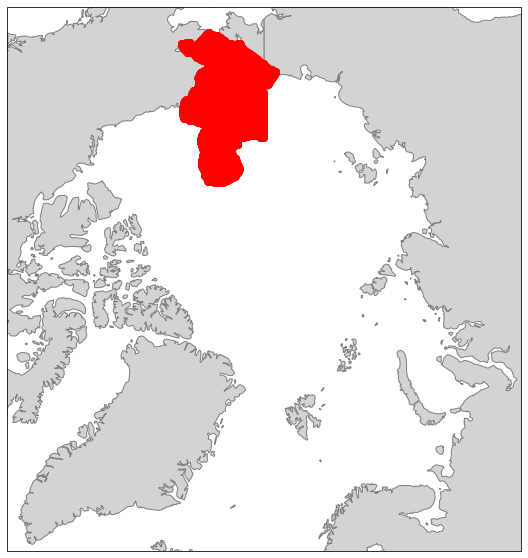

In [19]:
# Reproject the data / get projections #1 with masked lon-lat vectors
crs_latlon = ccrs.PlateCarree()
crs = ccrs.NorthPolarStereo()
num_id=29
index = df["Unique_ID"]
fig, ax = plt.subplots(figsize=(10, 10),subplot_kw=dict(projection=crs))
ax.plot(df.lon[index==num_id],df.lat[index==num_id],'r.',markersize=12, transform=crs_latlon)
ax.add_feature(cartopy.feature.LAND, zorder=1,facecolor='lightgray', edgecolor='gray')

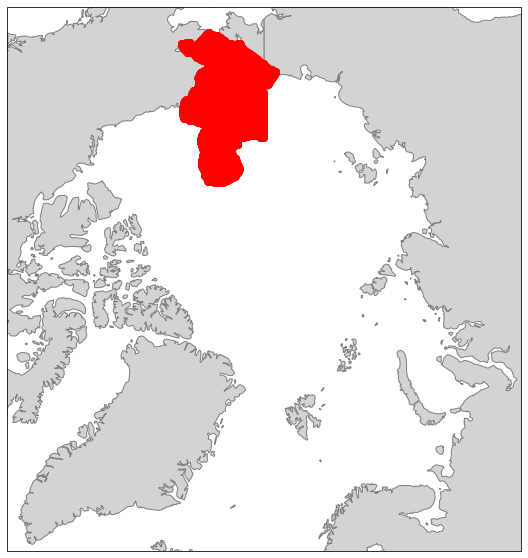

In [20]:
# Reproject the data / get projections
crs_latlon = ccrs.PlateCarree()
crs = ccrs.NorthPolarStereo()
num_id=29
index = df["Unique_ID"]

fig, ax = plt.subplots(figsize=(10, 10),subplot_kw=dict(projection=crs))

ax.plot(df_lon.lon[df.full_index[index==num_id]],df_lat.lat[df.full_index[index==num_id]],'r.',markersize=12, transform=crs_latlon)
ax.add_feature(cartopy.feature.LAND, zorder=1,facecolor='lightgray', edgecolor='gray')